## Inicjalizacja środowiska programistycznego

In [122]:
#Color printing
from termcolor import colored

#General data operations library
import math, string, glob
from datetime import datetime
import numpy as np
import functools
import pandas as pd

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf
import tensorflow_datasets as tfds
import tensorflow_text as tf_text

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

#import text_functions as txt_fcn
#importlib.reload(txt_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

Istnieje, niekompletny, zbiór standardowych operacji jakie wykonujemy na różnego typu danych zanim zostaną użyte jako wejście do modelu.
API Keras dostarcza gotowych warstw wykonujących wiele z tych [operacji](https://www.tensorflow.org/guide/keras/preprocessing_layers).
W tym notatniku użyjemy kilku z nich dla różnych rodzajów danych: **numerycznych**, **tekstowych**, **obrazów**.

## Dane numeryczne

### Normalizacja

Standardowa operacja, jaką wykonujemy na danych numerycznych przez podaniem ich na wejście modelu to normalizacja.
Normalizacja powoduje że rząd wielkości wag jest podobny dla wszystkich cech, a same wagi nei są zbyt duże.

```Python

normalization = tf.keras.layers.Normalization(mean, variance) # Normalizacja danych do średniej mean i wariancji wariance
                                                               # domyślnie mean=0, variance=1
                                                               # normalizacja przebiega dla każdej cechy oddzielnie
                                                               # wymaga ustalenia współczynników normalizacji przez metodę adapt(x)
normalization.adapt(x)                                                             
```


**Proszę:**

* wygenerować zbiór `(n,4)` liczb pochodzących z rozkładu płaskiego w zakresach `[[-5,5],[-4,2],[2,2]]`
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w zbiorze
* znormalizować dane do zakresu `[0,1]` dla każdej cechy oddzielnie
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w znormalizowanym zbiorze
* sprawdzić czy normalizacja zadziałała zgodnie z oczekiwaniem

In [5]:
n = 10_00
x = tf.random.uniform([n, 3])
scales = np.array([[-5,5],[-4,2],[-2,2]])
ranges = scales[:,1] - scales[:,0]
x = x * ranges + scales[:,0]
print(colored("min =", "blue"), tf.math.reduce_min(x, axis=0).numpy())
print(colored("mean =", "blue"), tf.math.reduce_mean(x, axis=0).numpy())
print(colored("max =", "blue"), tf.math.reduce_max(x, axis=0).numpy())
print(colored("stddev =", "blue"), tf.math.reduce_std(x, axis=0).numpy())
normalization = tf.keras.layers.Normalization()
normalization.adapt(x)
x = normalization(x)
print(colored("min =", "blue"), tf.math.reduce_min(x, axis=0).numpy())
print(colored("mean =", "blue"), tf.math.reduce_mean(x, axis=0).numpy())
print(colored("max =", "blue"), tf.math.reduce_max(x, axis=0).numpy())
pass

min = [-4.9953547 -3.994451  -1.9990792]
mean = [ 0.09718724 -1.0179393  -0.05635767]
max = [4.9848557 1.9981961 1.9971576]
stddev = [2.936068  1.7292116 1.1151315]
min = [-1.7344767 -1.7213115 -1.7421458]
mean = [-1.9729137e-08  1.4984607e-07 -1.9252301e-08]
max = [1.6646987 1.7442259 1.8415005]



### Dyskretyzacja

Czasami użyteczny jest podział danych numerycznych na kategorie - **dyskretyzacja**.
W sytuacji, gdy nie potrzebujemy dużej rozdzielczości wartości zmiennoprzecinkowe możemy podzielić
np. na `małe`, `średnie` i `duże`.
Redukcja rozdzielczości z poziomu zmiennoprzecinkowego do listy kategorii może też ułatwić trening.

```Python

discretization = tf.keras.layers.Discretization(num_bins, bin_boundaries, output_mode)
                 # Zamiana zmiennej ciągłej na dyskretną w postaci:
                 # output_mode = int - numer przedziału (wartość domyślna)
                 #               one_hot - wektor typu kodowania gorącojedynkowego
                 # num_bins - liczba przedziałów (wymaga zawołania metody adapt(x))
                 # bin_boundaries - zakresy przedziałów
```

**Proszę:**

* zdyskretyzować dane z poprzedniej komórki do 10 przedziałów
* narysować histogram numerów przedziałów dla **wszystkich** cech

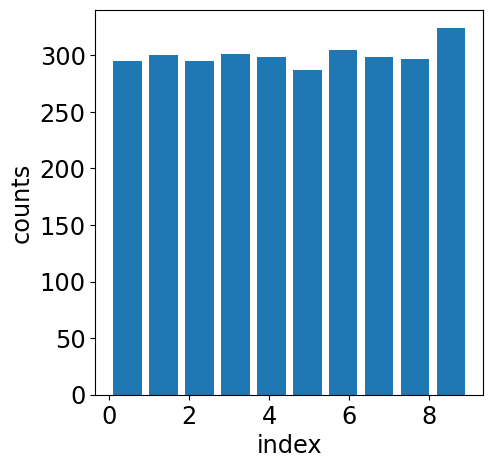

In [9]:
discretization = tf.keras.layers.Discretization(num_bins=10)
discretization.adapt(x)
y = discretization(x)

fig, axis = plt.subplots(1, 1, figsize=(5, 5))
counts, bins, _ = axis.hist(tf.reshape(shape=(-1,), tensor = y), rwidth=0.8)
axis.set_xlabel('index')
axis.set_ylabel('counts')
pass

## Obrazy

**Proszę:**

* korzystając z biblioteki `tensorflow_datasets` załadować zbiór `imagenette/160px`
* narysować kilka przykładowych rysunków

In [74]:
ds, ds_info = tfds.load('imagenette/160px', split='train', with_info=True)
pass

2025-05-21 12:23:26.764567: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


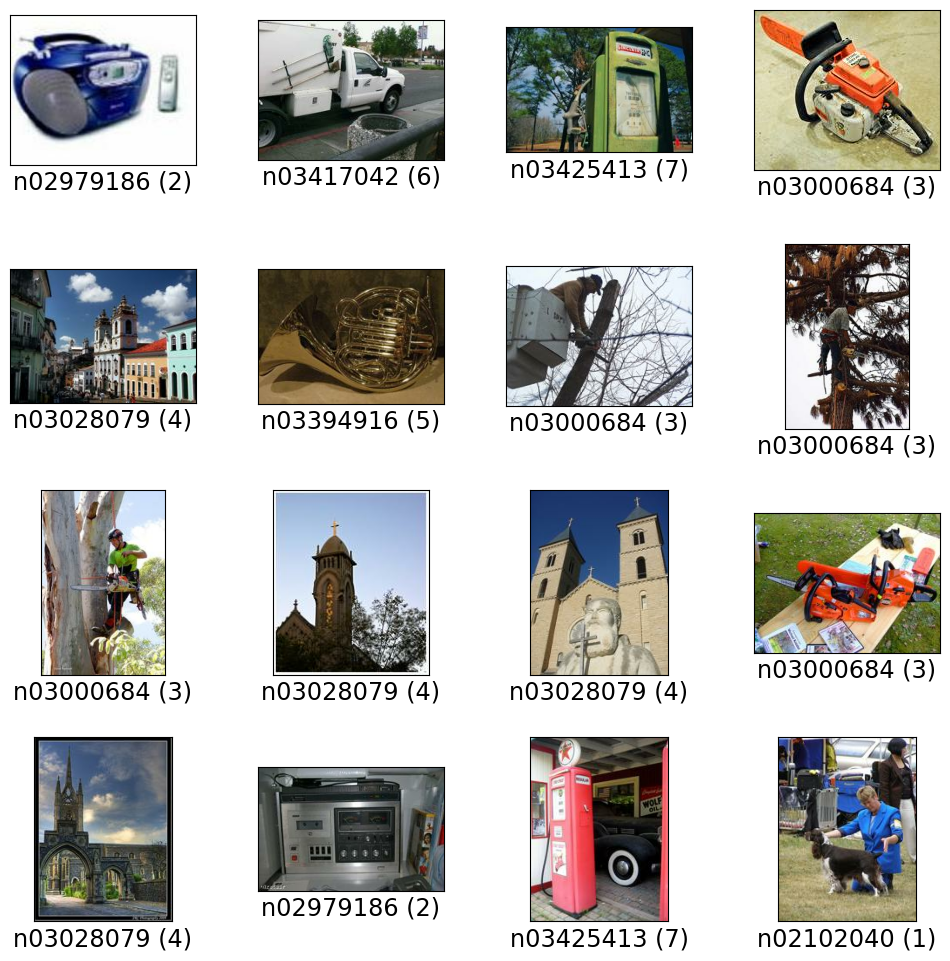

In [75]:
fig = tfds.show_examples(ds, ds_info, rows=4, cols=4)


### Skalowanie

Zmiana rozdzielczości - skalowanie obrazu. Skalowanie wymaga podania algorytmu interpolacji, pozwalającego
na obliczenie wartości pikseli w nowym obrazie.

```Python
tf.keras.layers.Resizing(
    height, width,                # szerokość i wysokość nowego obrazu
    interpolation='bilinear',     # algorytm interpolacji
    crop_to_aspect_ratio=False,   # przycinanie obrazu w celu uzyskania
                                  # tego samego stosunku szerokość/długość
                                  # jak w obrazie oryginalnym
)
```


## Przycinane

z całego obrazu jest wycinany fragment, `ramka`:


```Python
tf.keras.layers.CenterCrop(
    height, width              # szerokość i wysokość prostokąta wycinającego
                               # fragment w środku obrazu
)
```

Przycinanie w losowym miejscu może być użyte do wzbogacania próbki, poprzez generację
losowych fragmentów obrazu - ang. `augmenting`. Warstwy wykonujące losowe operacje na obrazach
są domyślnie aktywne tylko w czasie treningu.

```Python
tf.keras.layers.RandomCrop(
    height, width, seed=None,  # szerokość i wysokość prostokąta wycinającego
                               # fragment w losowym miejscu
                               #
)
```



### Obrót

```Python
tf.keras.layers.RandomRotation(
    factor,                         # zakres obrotu w jednostkach 2pi: (min, max)
    fill_mode='reflect',            # algorytm wypełnienia przestrzeni powstałej po obrocie obrazu
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,                 # wartość piksela użytego do wypełniania przestrzeni powstałej po przesunięciu obrazu,
                                    # jeśli jako `fill_mode=constant`
)
```




### Translacja

```Python
tf.keras.layers.RandomTranslation(
    height_factor,                  # względny współczynnik przesunięcia w pionie: (min, max)
    width_factor,                   # względny współczynnik przesunięcia w poziomie: (min, max)
    fill_mode='reflect',            # algorytm wypełnienia przestrzeni powstałej po przesunięciu obrazu
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,                 # wartość piksela użytego do wypełniania przestrzeni powstałej po przesunięciu obrazu,
                                    # jeśli jako `fill_mode=constant`
)
```


**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:
* skalowaniu obszaru do rozdzielczości `(320,320)`
* wypisać na ekran rozdzielczość pierwszego przykładu

**Wskazówki:**
* należy użyć metody `tf.data.Dataset.map()` z odpowiednią funkcją mapowania opartą o odpowiednią warstwę
* uwaga na typ danych w tensorze zawierającym przetworzone obrazy

Resolution: 320 320


2025-05-21 12:21:18.602209: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-21 12:21:18.630094: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


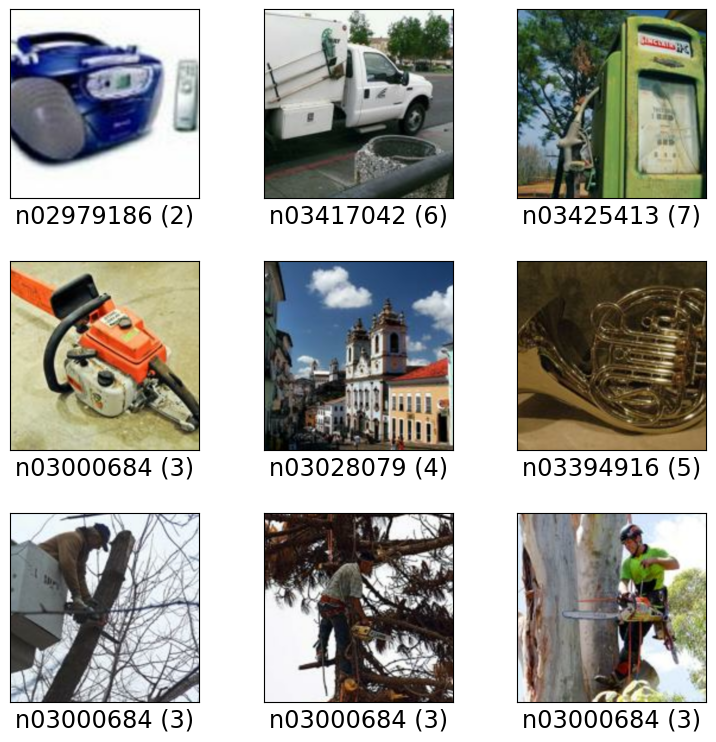

In [70]:
res = 320
layer = tf.keras.layers.Resizing(res, res, crop_to_aspect_ratio=True, dtype=tf.uint8)
ds = ds.map(lambda x: {'image': layer(x['image']), 'label': x['label']})
item = next(iter(ds))
x_res = item["image"].shape[0]
y_res = item["image"].shape[1]
print(colored("Resolution:", "green"), x_res, y_res)  
tfds.show_examples(ds, ds_info, rows=3, cols=3)
pass

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:
* przycinaniu do obszaru centralnego o rozmiarze `(64,64)`

**Wskazówki:**
* należy użyć metody `tf.data.Dataset.map()` z odpowiednią funkcją mapowania opartą o `tf.keras.layers.CenterCrop`
* uwaga na typ danych w tensorze zawierającym przetworzone obrazy

2025-05-21 12:21:30.559282: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


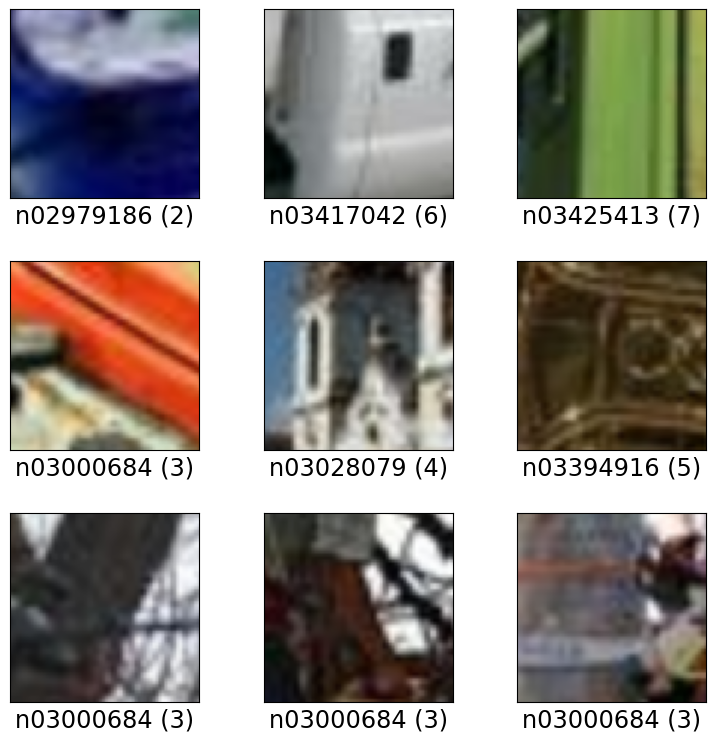

In [71]:
res = 64
layer = tf.keras.layers.CenterCrop(res, res, dtype=tf.uint8)
ds_crop = ds.map(lambda x: {'image': layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds_crop, ds_info, rows=3, cols=3)
pass

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:

* losowemu przycinaniu do obszaru o rozmiarze `(64,64)`

**Wskazówki:**
* użycie warstwy w definicji funkcji lambda spowoduje błędy. Proszę spróbować zinterpretować komunikat o błędzie i odpowiednio skorygować kod.


2025-05-21 12:22:31.003434: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


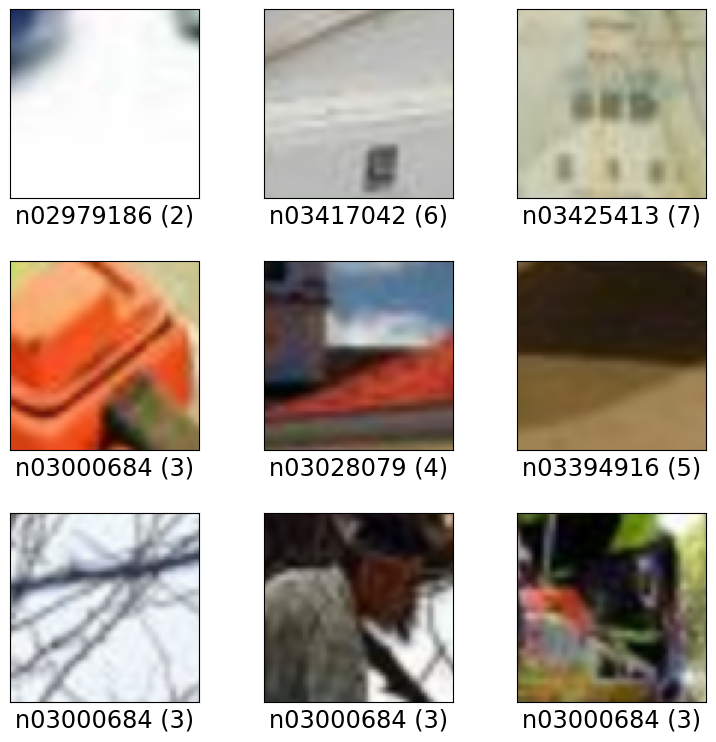

In [73]:
res = 64
layer = tf.keras.layers.RandomCrop(res, res, dtype=tf.uint8)
ds_random_crop = ds.map(lambda x: {'image': layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds_random_crop, ds_info, rows=3, cols=3)
pass

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:

* losowemu obrotowi w zakresie $\pm \pi/4$
* puste miejsca po obrocie proszę wypełnić kolorem czarnym

**Wskazówki:**
* użycie warstwy w definicji funkcji lambda spowoduje błędy. Proszę spróbować zinterpretować komunikat o błędzie i odpowiednio skorygować kod.


2025-05-21 12:35:20.202409: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


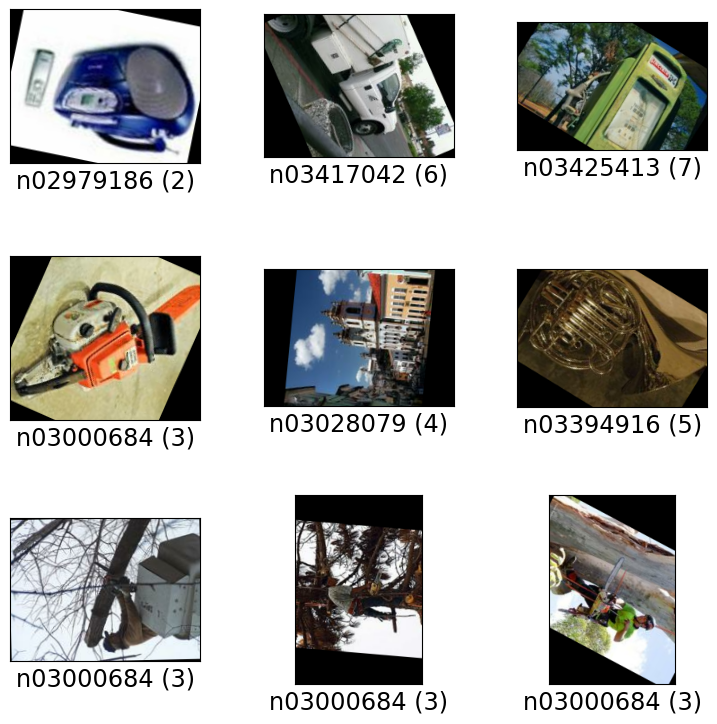

In [81]:
factor = np.pi/4
#factor = 1/8.0
layer = tf.keras.layers.RandomRotation(factor, fill_mode='constant', dtype=tf.uint8)
ds_random_crop = ds.map(lambda x: {'image': layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds_random_crop, ds_info, rows=3, cols=3)
pass

## Dane tekstowe

Zamiana tekstu na postać cyfrową może być wykonana na wiele sposobów. Dwa najbardziej popularne to:
* **wektoryzacja (ang. text vectorization)** - każdemu znacznikowi (ang. `token`) jest przypisana liczba całkowita, indeks w słowniku.
                 Odwzorowanie   ${\mathrm tekst}  \leftrightarrow {\mathrm indeks}$ jest ustalane na podstawie zawartości zbioru danych.

* **zanurzanie (ang. embedding)** - każdemu znacznikowi jest przypisany n-wymiarowy wektor liczb zmiennoprzecinkowych.
    Odwzorowanie   ${\mathrm tekst}  \leftrightarrow {\mathrm indeks}$ jest znajdowanie w czasie treningu modelu.

### Wektoryzacja

```Python
tf.keras.layers.TextVectorization(
    max_tokens=None,                           # maksymalna liczba znaczników w słowniku
    standardize='lower_and_strip_punctuation', # algorytm standaryzacji tekstu
    split='whitespace',                        # algorytm podziału na słowa
    ngrams=None,                               # algorytm podziału słów na n-literowe fragmenty
    output_mode='int',                         # typ wyjścia   
    output_sequence_length=None,               # maksymalna długość zakodowanej sekwencji "zdania"
    pad_to_max_tokens=False,                   # czy dopełniać sekwencję zerami do maksymalnej długości
    vocabulary=None                            # słownik. Jeśli nie jest podany generacja słownika wymaga zawołania
                                               # metody adapt()
)
 ```

 Znaczniki nie występujące w słowniku otrzymają ten sam indeks oznaczający znacznik OOV (`ang. out of vocabulary`)

**Proszę:**

* zbudować słownik na tekście `wksf/Korpus_surowy` wczytywanym w ramach zadania domowego z poprzedniego notatnika
* zwektoryzować teskt `Król zasiada na tronie.`
* wypisać na ekran zwektoryzowaną postać
* przeprowadzić operację odwrotną - z postaci zwektoryzowanej odtworzyć tekst
* powtórzyć procedurę dla tekstu `Ania ma małego kotka.`

**Wskazówki**:
* słownik utworzony przez warstwę `tf.keras.layers.TextVectorization` uzyskujemy przez metodę `get_vocabulary()`
* z elementów sekwencji `words` można utworzyć napis w następujący sposób:
```Python
sentence = " ".join(words)
```


In [101]:
import text_functions as txt_fcn
importlib.reload(txt_fcn);

filePath = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy"
dataset = txt_fcn.load_wksf_dataset(filePath)

vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=1000000, output_mode = "int")
vectorize_layer.adapt(dataset.batch(128))

vocabulary = vectorize_layer.get_vocabulary() 
vocab_arr = np.array(vocabulary)

print(colored("Vocabulary:", "red"))

print(vocab_arr[:100])
pass


Reading text from files:  ['/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/d-proza.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/e-dramat.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/b-prasa.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/c-popul.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/a-publi.txt']
Vocabulary:
['' '[UNK]' 'w' 'i' 'się' 'nie' 'na' 'z' 'do' 'to' 'że' 'a' 'o' 'jest'
 'jak' 'co' 'tak' 'ale' 'po' 'od' 'tym' 'już' 'za' 'tylko' 'przez' 'dla'
 'ja' 'tego' 'czy' 'pan' 'mnie' 'jeszcze' 'ma' 'może' 'są' 'przy' 'ze'
 'mi' 'ten' 'roku' 'było' 'jego' 'bo' 'tu' 'będzie' 'ich' 'sobie' 'tej'
 'bardzo' 'go' 'tysiąc' 'no' 'które' 'był' 'oraz' 'nawet' 'więc' 'jej'
 'tych' 'tam' 'przed' 'być' 'też' 'jednak' 'on' 'pani' 'pod' 'można'
 'pracy' 'który' '—' 'nic' 'te' 'dziewięćset' 'teraz' 'również' 'ty'
 'między' 'prz

In [102]:
text = 'Król zasiada na tronie.'
print(colored("Text:", "green"), text)
encoded = vectorize_layer(tf.constant(text))
print(colored("Encoded:", "blue"), encoded.numpy())

Text: Król zasiada na tronie.
Encoded: [ 1367 39426     6 25450]


In [103]:
decoded = " ".join(vocab_arr[encoded.numpy()])
print(colored("Decoded: ", "blue"), decoded)

Decoded:  król zasiada na tronie


In [104]:
text = 'Ania ma małego kotka.'
print(colored("Text:", "green"), text)
encoded = vectorize_layer(tf.constant(text))
print(colored("Encoded:", "blue"), encoded.numpy())
decoded = " ".join(vocab_arr[encoded.numpy()])
print(colored("Decoded: ", "blue"), decoded)

Text: Ania ma małego kotka.
Encoded: [84043    32  2415     1]
Decoded:  ania ma małego [UNK]


In [105]:
text = 'Rycerz wiatru -- Kaladin, podniósł włócznię.'
print(colored("Text:", "green"), text)
encoded = vectorize_layer(tf.constant(text))
print(colored("Encoded:", "blue"), encoded.numpy())
decoded = " ".join(vocab_arr[encoded.numpy()])
print(colored("Decoded: ", "blue"), decoded)

Text: Rycerz wiatru -- Kaladin, podniósł włócznię.
Encoded: [14156  2763 73568  2270 41040]
Decoded:  rycerz wiatru kaladin podniósł włócznię


### Zanurzanie


```Python
tf.keras.layers.Embedding(
    input_dim,                          # rozmiar słownika - liczba znaczników ("tokenów")
    output_dim,                         # wymiar reprezentacji  
)
```

Warstwa zanurzająca przypisuje wartość zmiennoprzecinkową każdemu znacznikowi.
Taką operację można reprezentować przez macierz `(output_dim, input_dim)` która działa na wektor gorącojedynkowy o długości `(input_dim)`
i produkuje reprezentację zmiennoprzecinkową o długości `output_dim`
Tutaj `output_dim=3`:

$$
\huge{
\begin{bmatrix}
a_{0} & b_{0} & c_{0} & \dots \\
a_{1} & b_{1} & c_{1} & \dots \\
a_{2} & b_{2} & c_{2} & \dots \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
0 \\
0 \\
\dots \\
0
\end{bmatrix}
=
\begin{bmatrix}
a_{0} \\
a_{1} \\
a_{2}
\end{bmatrix}
}
$$
Warstwa `tf.keras.layers.Enbedding()` realizuje tę operację w sposób zoptymalizowany.
Macierz zanurzania jest zwykle zmieniana w trakcie treningu modelu który ją zawiera, więc nie jest to standardowa warstwa wstępnego przetwarzania.


**Proszę:**

* zwektoryzować teskt `Król zasiada na tronie.`
* zwektoryzowaną postać podać na wejście warstwy zanurzającej z `nDims = 4`
* wypisać na ekran obie postacie tekstu

In [106]:
nTokens = len(vocabulary)
nDims = 4 
embedding_layer = tf.keras.layers.Embedding(nTokens, nDims)

text = 'Król zasiada na tronie.'
print(colored("Text:", "green"), text)
encoded = vectorize_layer(tf.constant(text))
print(colored("Encoded:", "blue"), encoded.numpy())
embedding = embedding_layer(encoded)
print(colored("Embedding:\n", "blue"), embedding.numpy())
pass

Text: Król zasiada na tronie.
Encoded: [ 1367 39426     6 25450]
Embedding:
 [[ 0.03791057  0.01662273 -0.04441136  0.02066651]
 [-0.04907248  0.02262929  0.01108276 -0.02746564]
 [ 0.01077205 -0.03737783  0.03891318  0.0496656 ]
 [-0.03919065 -0.04392123  0.01436448  0.04968223]]


### Podział na n-gramy

W czasie analizy tekst zwykle dzieli się na fragmenty zawierające `n` znaczników (ang. `tokens`) - n-gramy.
Podzielimy zdania wczytane z korpusu języka polskiego na odcinki o długości `n` wyrazów. Skorzystamy z gotowych funkcji służących
do operowania na napisach dostępnych w dedykowanej bibliotece `tensorflow_text`

* podział tekstu na fragmenty (tutaj wyrazy oddzielone spacją):
```Python
tensorflow_text.WhitespaceTokenizer().tokenize(text)
```

* tworzenie grup o wybranej długości z użyciem biegnącego okna - grupy się przekrywają za wyjątkiem ostatniego wyrazu, czyli krok okna ang. `stride`
wynosi 1
```Python
tensorflow_text.tf_text.sliding_window(data,       # lista znaczników        
                                       width,      # szerokość okna przebiegającego listę
                                       axis=-1,    # wymiar, wzdłuż którego biegnie okno
                                       name=None   # nazwa funkcji
```

In [116]:
import tensorflow_text as tf_text
import functools

# load the dataset
filePath = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy"
dataset = txt_fcn.load_wksf_dataset(filePath)

# split lines into words
dataset = dataset.map(tf_text.WhitespaceTokenizer().tokenize)

# remove empty lines
dataset = dataset.filter(lambda x: tf.size(x) > 0)

# fix all function arguments except for the input data
window_size = 5
slidingWindowWithWidth = functools.partial(tf_text.sliding_window, width=window_size)

# apply the sliding window to each line.
# this will priduce a tensor of shape (n, width) for each line,
# where n in the number of groups of words of words of width length
dataset = dataset.map(slidingWindowWithWidth)

print(colored("First example:", "blue"))
for item in dataset.take(1):
    print(colored("Text: ", "blue"), item.numpy())

Reading text from files:  ['/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/d-proza.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/e-dramat.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/b-prasa.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/c-popul.txt', '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/wksf/Korpus_surowy/a-publi.txt']
First example:
Text:  [[b'Poza' b'tym' b'miasto' b'Remus' b'nie']
 [b'tym' b'miasto' b'Remus' b'nie' b'jest']
 [b'miasto' b'Remus' b'nie' b'jest' b'miejscem,']
 [b'Remus' b'nie' b'jest' b'miejscem,' b'w']
 [b'nie' b'jest' b'miejscem,' b'w' b'kt\xc3\xb3rym']
 [b'jest' b'miejscem,' b'w' b'kt\xc3\xb3rym' b'ktokolwiek']
 [b'miejscem,' b'w' b'kt\xc3\xb3rym' b'ktokolwiek' b'cokolwiek']
 [b'w' b'kt\xc3\xb3rym' b'ktokolwiek' b'cokolwiek'
  b'odwa\xc5\xbcy\xc5\x82by']
 [b'kt\xc3\xb3rym' b'ktokolwiek' b'cokolwiek' b'odwa\xc5\x

Po podziale na n-gramy z jednego wiersza zrobiło się wiele fragmentów o długości `window_size`. Możemy je traktować jako paczki.
Operacja rozpaczkowania, `dataset.unbatch()` z powrotem przywróci zbiór do `postaci jeden przykład na wiersz`.

Rozpaczkowane wyrazy możemy z powrotem połączyć w fragmenty zdań.


In [117]:
# split the (n, width) tensor into (n) tensors of shape (width)
dataset = dataset.unbatch()

# merge words into sentence framgents
dataset = dataset.map(lambda x: tf.strings.reduce_join(x, separator=' '))

print(colored("First five five-word blocks:", "blue"))
for item in dataset.take(5):
    print(colored("Text: ", "blue"), item.numpy().decode())

First five five-word blocks:
Text:  Poza tym miasto Remus nie
Text:  tym miasto Remus nie jest
Text:  miasto Remus nie jest miejscem,
Text:  Remus nie jest miejscem, w
Text:  nie jest miejscem, w którym


**Proszę:**

* stworzyć słownik do wektoryzacji tekstu używając warstwy `tf.keras.layers.TextVectorization.adapt(...)`
* stworzyć zwektoryzowany zbiór danych: `dataset_vectorized` używając warstwy `tf.keras.layers.TextVectorization` i operacji `dataset.map()`
* zachować słownik w zmiennej `vocabulary` w postaci macierzy numpy
* usunąć przykłady z miej niż dwo wyrazami w zdaniu
* wypisać na ekran liczbę znaczników w słowniku
* wypisać na ekran pięć pierwszych przykładów w zwektoryzowanej postaci

**Wskazówka:**
* operacje na zbiorach danych można przyspieszyć wykonując je na paczkach:
```Python
dataset.batch(n).map(...).unbatch()
```

In [118]:
vectorize_layer = tf.keras.layers.TextVectorization(output_mode="int")
vectorize_layer.adapt(dataset.batch(1024))
vocabulary = np.array(vectorize_layer.get_vocabulary())
vocabulary_length = vocabulary.shape[0]
dataset_vectorized = dataset.batch(1024).map(vectorize_layer, num_parallel_calls=tf.data.AUTOTUNE).unbatch()
#dataset_vectorized = dataset_vectorized.filter(lambda x: tf.math.count_nonzero(x==1, axis=0) < 2)
print(colored("Vocablurary length:", "red"), vocabulary_length)

print(colored("First five five-word blocks in the vectorized form:", "blue"))
for item in dataset_vectorized.take(5):
    print(colored("Text: ", "blue"), item)

Vocablurary length: 84663
First five five-word blocks in the vectorized form:
Text:  tf.Tensor([  319    20   786 20012     5], shape=(5,), dtype=int64)
Text:  tf.Tensor([   20   786 20012     5    13], shape=(5,), dtype=int64)
Text:  tf.Tensor([  786 20012     5    13  6320], shape=(5,), dtype=int64)
Text:  tf.Tensor([20012     5    13  6320     2], shape=(5,), dtype=int64)
Text:  tf.Tensor([   5   13 6320    2  191], shape=(5,), dtype=int64)


**Proszę:**

* przekształcić zwektoryzowany zbiór zawierający n-gramy do postaci `(cechy, etykieta)` gdzie:
    * **etykieta** - środkowy wyraz
    * **cechy** - wyrazy poza wyrazem środkowym

* przekształcenie powinno korzystać z metody `Dataset.map(...)` z użyciem własnej funkcji mapującej `map_fn(...)`
* założyć, że zbiór został podzielony na paczki, więc pojedynczy element ma kształt `(None,width)`
* wypisać na ekran cechy i etykiety dla pięciu przykładów

**Wskazówki**:
* można założyć że `n=5`
* można założyć, że środkowy wyraz ma indeks `2`


In [119]:
###################################################
def map_fn(x):
    middle = 2
    features =  tf.concat((x[:,:middle], x[:,middle+1:]), axis=1)
    label = x[:,middle]
    return features, label
###################################################
def print_item(batch, vocabulary, width=2):
    batch_index = 0
    item = (batch[0][batch_index], batch[1][batch_index])
    features = " ".join(vocabulary[item[0].numpy()[0:width]])
    label = vocabulary[item[1].numpy()]
    print(colored("Features", "blue"), end=" ")
    print(colored("(Label):", "red"), end=" ")

    print(features, end=" ")
    print(colored(label,"red"), end=" ")
    features = " ".join(vocabulary[item[0].numpy()[width:]])
    print(features)
###################################################

dataset_final = dataset_vectorized.batch(32).map(map_fn)

for item in dataset_final.take(5):
    print_item(item, vocabulary)
    print(colored("Vectorized form:", "blue"), )
    print(colored("Features: ", "blue"), item[0][0].numpy(), end=" ")
    print(colored("Label: ", "blue"), item[1][0].numpy())

Features (Label): poza tym miasto remus nie
Vectorized form:
Features:  [  319    20 20012     5] Label:  786
Features (Label): ma jakiś dokuczający mu drobiazg
Vectorized form:
Features:  [  32  350   78 5508] Label:  72837
Features (Label): cena jaką postawiono za wydanie
Vectorized form:
Features:  [3725  622   22 7096] Label:  10128
Features (Label): ty tutaj robisz zapytał 
Vectorized form:
Features:  [  77  231 1645    0] Label:  3239
Features (Label): która jest pełna pytań bez
Vectorized form:
Features:  [ 116   13 3694   85] Label:  2273


**Proszę:**

* sprawdzić prędkość czytania finalnego zbioru danych korzystając z funkcji `benchmark`


In [123]:
tfds.benchmark(dataset_final)
pass


************ Summary ************



15724it [00:05, 2946.17it/s]

Examples/sec (First included) 2912.18 ex/sec (total: 15725 ex, 5.40 sec)
Examples/sec (First only) 12.09 ex/sec (total: 1 ex, 0.08 sec)
Examples/sec (First excluded) 2957.29 ex/sec (total: 15724 ex, 5.32 sec)


# Zadanie domowe

**Proszę:**

* załadować tekst z pliku filePath = `shakespeare.txt'`

```Python

filePath = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
```

* wykonać `preprocessing` tekstu:
    * podział tekstu na fragmenty o długości pięciu wyrazów. Jeden przykład w nowym zbiorze powinien składać się jednego 5-wyrazowego fragmentu,
      a nie grupy fragmentów powstałej z podziału zdania na kawałki o długości pięciu wyrazów:
      ```
      
      Features (Label): before we proceed any further
      Features:  [128  33 123 639] Label:  1267
      ```
    * tokenizacja ze słownikiem ograniczonym do **1000** znaczników
    * podział fragmentów na etykietę (wyraz środkowy) i cechy (pozostałe wyrazy)
      

* wypisać na ekran pięć przykładów z zaznaczeniem cech i etykiety
* stworzyć warstwę zanurzającą ze `128` wymiarami
* wypisać na ekran pięć wyrazów najbliższych wyrazowi `man` w przestrzeni zanurzającej z odległością kosinusową:
```Python
cosine_similarity = tf.keras.losses.cosine_similarity(...)
```
* wypisać na ekran pięć słów najbliższych do sumy słów `mother` i `father` wykonanej w przestrzeni zanurzenia

**Wskazówki:**
* największe `n` wartości z listy można uzyskać funkcją `tf.math.top_k(...)`

<hr>

**Opcjonalnie:**

* przeprowadzić trening warstwy zanurzającej ze `128` wymiarami z użyciem algorytmu ciągłego worka słów - [`Continous Bag of Words (CBOW)`](https://d2l.ai/chapter_natural-language-processing-pretraining/word2vec.html#the-continuous-bag-of-words-cbow-model) (wersja naiwna).

**Wskazówki:**

* obliczenie iloczynu skalarnego reprezentacji cech i wszystkich słów słownika wymaga zdefiniowania warstwy liczącej iloczyn skalarny:
```Python
class Dot(tf.keras.Layer):
    def call(self, x):
        dot_product = ...
        return dot_product

```
i użycia jej w definicji modelu.
<hr>

In [ ]:
# load text
...rozwiązanie...

# adapt vextorization layer
...rozwiązanie...

# split lines into words
...rozwiązanie...

# fix all tf_text.sliding_window function arguments except for the input data
...rozwiązanie...

# apply the sliding window to each line.
# this will produce a tensor of shape (n, width) for each line,
# where n in the number of groups of words with length width
...rozwiązanie...

# remove empty lines
...rozwiązanie...

# split the (n, width) tensor into (n) tensors of shape (width)
...rozwiązanie...

# merge words into sentence framgents
...rozwiązanie...

#Vectorize
...rozwiązanie...

for item in dataset_final.take(5):
    print_item(item, vocabulary, width=2)
    print(colored("Features: ", "blue"), item[0][0].numpy(), end=" ")
    print(colored("Label: ", "blue"), item[1][0].numpy())

In [ ]:
%time
# CBOW model training (optional)
...rozwiązanie...

#Evaluate non trained model
model.evaluate(dataset_final.take(16))

#Training
...rozwiązanie...
pass

In [ ]:
# Embeding space exploration - words similar to "man"
...rozwiązanie...
pass

In [ ]:
# Word arithmetics - words similar to "mother" + "father"
words = np.array(["father", "mother"])
...rozwiązanie...
pass

Odwzorowanie zanurzenia można zwizualizować z użyciem portalu [Embeding Projector](http://projector.tensorflow.org/?_gl=1*u2l7wh*_ga*MTg4NTM3NDUwOC4xNzA3OTg4NTU4*_ga_W0YLR4190T*MTcxNTI0MzQxOC44Ny4xLjE3MTUyNDQ5NzMuMC4wLjA.)
Na stronę trzeba załadować pliki `vectors.tsv` i `metadata.tsv` uzyskane z warstwy zanurzającej.

In [ ]:
def dump_embedding(model, vocabulary):
  import io
  out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
  out_m = io.open('metadata.tsv', 'w', encoding='utf-8')
  weights = model.get_layer('embedding').get_weights()[0]
  for index, word in enumerate(vocabulary):
    if index == 0:
      continue  # skip 0, it's padding.
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
  out_v.close()
  out_m.close()

dump_embedding(model, vocabulary)